# Noise2Void - 3D Example for Parhyale Data

__Note:__ This notebook expects a trained model and will only work if you have executed the `01_training.ipynb` beforehand.

In [1]:
# We import all our dependencies.
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from tifffile import imread
from csbdeep.io import save_tiff_imagej_compatible

2022-09-29 17:45:01.796545: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


## Load the Network

In [2]:
# A previously trained model is loaded by creating a new N2V-object without providing a 'config'.
model_name = 'n2v_3D_20220927'
basedir = 'models'
model = N2V(config=None, name=model_name, basedir=basedir)

2022-09-29 17:45:05.036078: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-29 17:45:05.982521: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1532] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 195 MB memory:  -> device: 0, name: NVIDIA RTX A6000, pci bus id: 0000:73:00.0, compute capability: 8.6
2022-09-29 17:45:06.003387: I tensorflow/stream_executor/cuda/cuda_driver.cc:739] failed to allocate 195.44M (204931072 bytes) from device: CUDA_ERROR_OUT_OF_MEMORY: out of memory


Loading network weights from 'weights_best.h5'.


In [3]:
# In case you do not want to load the weights that lead to lowest validation loss during 
# training but the latest computed weights, you can execute the following line:

# model.load_weights('weights_last.h5')

## Prediction
Here we will simply use the same data as during training and denoise it using our network.

In [3]:
datadir = '2022-09-27'
preddir = 'pred_' + datadir
for i in range(10):
    # We load the data we want to process.
    img = imread(f'{datadir}/t{i:03d}.tif')

    # Here we process the data.
    # The 'n_tiles' parameter can be used if images are too big for the GPU memory.
    # If we do not provide the 'n_tiles' parameter the system will automatically try to find an appropriate tiling.
    pred = model.predict(img, axes='ZYX', n_tiles=(2,4,4))
    save_tiff_imagej_compatible(f'{preddir}/t{i:03d}.tif', pred, 'ZYX')

The input image is of type uint8 and will be casted to float32 for prediction.


2022-09-29 17:46:23.056201: E tensorflow/stream_executor/cuda/cuda_dnn.cc:389] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2022-09-29 17:46:23.056297: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at conv_ops_3d.cc:507 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node 'model/channel_0down_level_0_no_0/Conv3D' defined at (most recent call last):
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/traitlets/config/application.py", line 976, in launch_instance
      app.start()
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 712, in start
      self.io_loop.start()
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
      self._run_once()
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
      handle._run()
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/asyncio/events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_1497680/1079561484.py", line 10, in <module>
      pred = model.predict(img, axes='ZYX', n_tiles=(2,4,4))
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/n2v/models/n2v_standard.py", line 403, in predict
      n_tiles=new_n_tiles)[0]
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/csbdeep/models/care_standard.py", line 374, in _predict_mean_and_scale
      n_tiles=n_tiles,block_sizes=net_axes_in_div_by,tile_overlaps=net_axes_in_overlaps,pbar=progress)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/csbdeep/internals/predict.py", line 100, in predict_tiled
      pred = predict_tiled(keras_model,tile,n_tiles_remaining,block_sizes,tile_overlaps,axes_in,axes_out,pbar=pbar,**kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/csbdeep/internals/predict.py", line 100, in predict_tiled
      pred = predict_tiled(keras_model,tile,n_tiles_remaining,block_sizes,tile_overlaps,axes_in,axes_out,pbar=pbar,**kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/csbdeep/internals/predict.py", line 100, in predict_tiled
      pred = predict_tiled(keras_model,tile,n_tiles_remaining,block_sizes,tile_overlaps,axes_in,axes_out,pbar=pbar,**kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/csbdeep/internals/predict.py", line 51, in predict_tiled
      pred = predict_direct(keras_model,x,axes_in,axes_out,**kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/csbdeep/internals/predict.py", line 41, in predict_direct
      pred = from_tensor(keras_model.predict(x,**kwargs),channel=channel_out,single_sample=single_sample)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/engine/training.py", line 2033, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/engine/training.py", line 1845, in predict_function
      return step_function(self, iterator)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/engine/training.py", line 1834, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/engine/training.py", line 1823, in run_step
      outputs = model.predict_step(data)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/engine/training.py", line 1791, in predict_step
      return self(x, training=False)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/engine/training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/engine/functional.py", line 459, in call
      inputs, training=training, mask=mask)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/engine/functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/engine/base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/layers/convolutional/base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "/mnt/md0/applications/miniconda3/envs/n2v/lib/python3.7/site-packages/keras/layers/convolutional/base_conv.py", line 232, in convolution_op
      name=self.__class__.__name__)
Node: 'model/channel_0down_level_0_no_0/Conv3D'
DNN library is not found.
	 [[{{node model/channel_0down_level_0_no_0/Conv3D}}]] [Op:__inference_predict_function_1362]

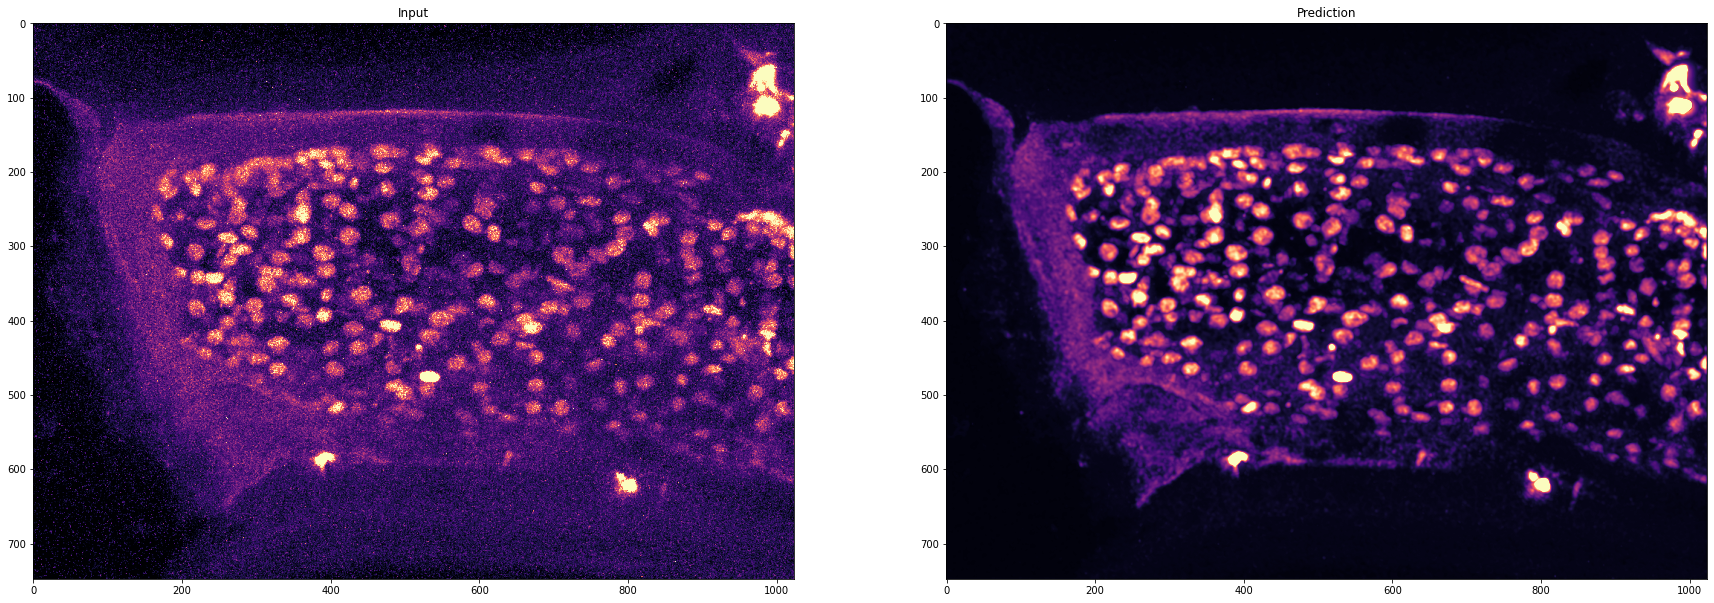

In [6]:
# Let's look at the results.
plt.figure(figsize=(30,30))

# We show the noisy input...
plt.subplot(1,2,1)
plt.imshow(np.max(img,axis=0),
           cmap='magma',
           vmin=np.percentile(img,0.1),
           vmax=np.percentile(img,99.9)
          )
plt.title('Input');

# and the result.
plt.subplot(1,2,2)
plt.imshow(np.max(pred,axis=0), 
           cmap='magma',
           vmin=np.percentile(pred,0.1),
           vmax=np.percentile(pred,99.9)
          )
plt.title('Prediction');

## Save results

In [6]:
save_tiff_imagej_compatible('prediction.tif', pred, 'ZYX')